In [1]:
#common packages we basically always need
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from time import time


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


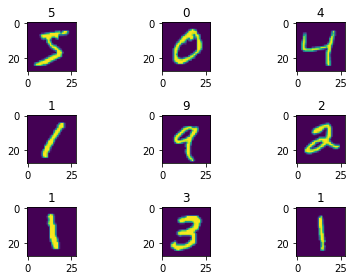

In [2]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)



Xtrain, Xtest = data['trainX'].astype(float), data['testX'].astype(float)
ytrain, ytest = data['trainY'][0], data['testY'][0]

#pull and plot some samples
for k in range(9):
    plot_data = Xtrain[k,:]
    plot_data = np.reshape(plot_data,(28,28))
    plot_label = ytrain[k]
    plt.subplot(3,3,k+1)
    plt.imshow(plot_data)
    plt.title(plot_label)
plt.tight_layout()

In [3]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)


select_train = np.logical_or(np.equal(ytrain,4),np.equal(ytrain,9))
select_test = np.logical_or(np.equal(ytest,4),np.equal(ytest,9))
Xtrain = Xtrain[select_train,:]
Xtest = Xtest[select_test,:]
ytrain = np.sign(np.equal(ytrain[select_train],4.)-.5)
ytest = np.sign(np.equal(ytest[select_test],4.)-.5)


m,n = Xtrain.shape
mt = Xtest.shape[0]

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


# Loss Function

$-\frac{1}{m}\sum_{i=1}^mlog(\sigma(y_ix_i^T\theta))$

# Gradient

$-\frac{1}{m}\sum_{i=1}^m(1-sigma(y_ix_i^T\theta))y_ix_i$

In [4]:
def getLossFunction(theta):
    theta, y = theta.reshape(-1,1), ytrain.reshape(-1, 1)
    z = y * np.dot(Xtrain, theta)
    loss = (-1 / y.shape[0]) * np.sum(np.log(1 / (1 + np.exp(-z))))
    return loss

def getGradient(theta):
    theta, y = theta.reshape(-1,1), ytrain.reshape(-1, 1)
    z = 1 - (1 / (1 + np.exp(-y * np.dot(Xtrain, theta))))
    gradient = (-1 / y.shape[0]) * np.dot(Xtrain.T, y * z)
    return gradient

# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ', getLossFunction(theta),np.sum(getGradient(theta)))

Check number:  45.19215648734921 12343.176947604468


In [5]:
def getAccuracy(X, y, theta):
    pred = np.dot(X, theta)
    z = np.where(pred>=0, 1, -1).reshape(-1, )
    return np.sum(y == z)/len(y)

# Gradient Descent: 1500 Iterations, Step size 10^-6 

In [6]:
step = 0.000001 #10^-6
iters = 1500

trainLoss, trainPred, testPred  = [], [], []

theta = np.zeros((n, 1))
start = time()
for i in (range(iters)):

    trainPred.append(1-getAccuracy(Xtrain, ytrain, theta))
    testPred.append(1-getAccuracy(Xtest, ytest, theta))
    
    trainLoss.append(getLossFunction(theta))
    
    theta = theta - getGradient(theta) * step

#     if i%10 == 0: 
#        print("Iterations Complete: {}, Loss: {}".format(i, getLossFunction(theta)))
print(time()-start, ' seconds to run gradient descent')

10.343082189559937  seconds to run gradient descent


1500 Iterations complete
Train Accuracy:0.964, Test Accuracy:0.966
Train Loss:0.109


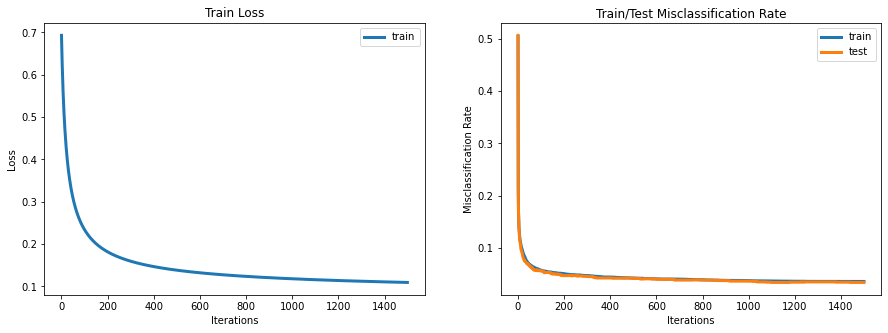

In [7]:
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(trainLoss, label = "train", linewidth=3)
plt.title("Train Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig('MNIST_Training_Loss.png')

plt.subplot(1,2,2)
plt.plot(trainPred, label = "train", linewidth=3)
plt.plot(testPred, label = "test", linewidth=3)
plt.title("Train/Test Misclassification Rate")
plt.xlabel('Iterations')
plt.ylabel('Misclassification Rate')
plt.legend()
plt.savefig('MNIST_Misclassification_Rate.png')


print ("{} Iterations complete".format(iters))
print ("Train Accuracy:{0:.3f}, Test Accuracy:{1:.3f}".format(1-trainPred[-1], 1-testPred[-1]))
print ("Train Loss:{0:.3f}".format(trainLoss[-1]))

# Stochastic Gradient Descent

In [8]:
def getStochGradient(theta, minibatch):
    theta, y = theta.reshape(-1,1), ytrain.reshape(-1, 1)
    z = 1 - (1 / (1 + np.exp(-y[minibatch] * np.dot(Xtrain[minibatch,:], theta))))
    gradient = (-1 / y[minibatch].shape[0]) * np.dot(Xtrain[minibatch,:].T, y[minibatch] * z)
    return gradient
    
# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ',np.sum(getStochGradient(theta,[1,4,6,2])))

Check number:  5803.5


# Stochastic Gradient Descent: Batchsize = 1

In [9]:
step = 0.000001 #10^-6
iters = 50000
batchsize = 1

trainLoss_sgd, trainPred_sgd, testPred_sgd, epochTimes_sgd  = [], [], [], []
theta = np.zeros((n, 1))
start = time()
idx = np.array(range(m))
epoch_count = 0

for i in (range(iters)):
    
    if len(idx) < batchsize: 
        trainLoss_sgd.append(getLossFunction(theta))
        trainPred_sgd.append(getAccuracy(Xtrain, ytrain, theta))
        testPred_sgd.append(getAccuracy(Xtest, ytest, theta))
        epochTimes_sgd.append(time()-start)
        epoch_count += 1
        #print("Epoch completed:{}".format(epoch_count))
        idx = np.array(range(m))
    else:
        minibatch = idx[:batchsize]
        idx = idx[batchsize:]

    theta = theta - getStochGradient(theta, minibatch) * step
            
#          if i%100 == 0: 
#              print("Iterations Complete: {}, Loss: {}".format(i, getLossFunction(theta)))
print (time()-start, 'seconds to run stochastic gradient descent')

print ("{} Iterations completed".format(i+1))
print ("{} Epochs completed".format(epoch_count))
print ("Train Accuracy:{0:.3f}, Test Accuracy:{1:.3f}".format(trainPred_sgd[-1], testPred_sgd[-1]))
print ("Train Loss:{0:.3f}".format(trainLoss_sgd[-1]))

0.9728949069976807 seconds to run stochastic gradient descent
50000 Iterations completed
4 Epochs completed
Train Accuracy:0.968, Test Accuracy:0.968
Train Loss:0.095


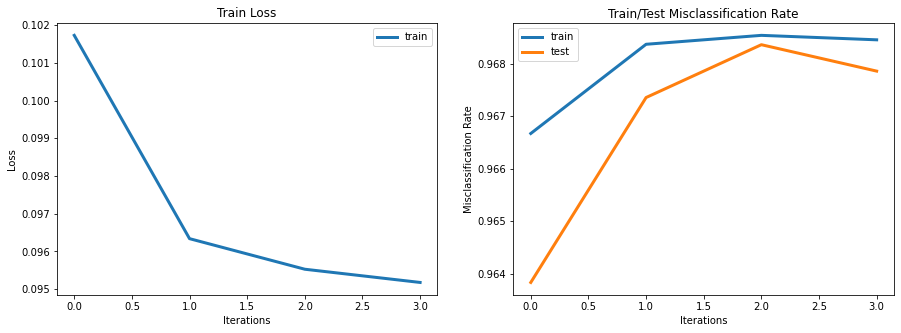

In [10]:
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout()


plt.subplot(1,2,1)
plt.plot(trainLoss_sgd, label = "train", linewidth=3)
plt.title("Train Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig('SGD_Training_Loss.png')

plt.subplot(1,2,2)
plt.plot(trainPred_sgd, label = "train", linewidth=3)
plt.plot(testPred_sgd, label = "test", linewidth=3)
plt.title("Train/Test Misclassification Rate")
plt.xlabel('Iterations')
plt.ylabel('Misclassification Rate')
plt.legend()
plt.savefig('SGD_Misclassification_Rate.png')

# Stochastic Gradient Descent: Minibatch size = 50, Iterations = 50000, Epochs ~ 211

In [11]:
step = 0.000001 #10^-6
iters = 50000
batchsize = 50

trainLoss, trainPred, testPred  = [], [], []
epochTimes = []
theta = np.zeros((n, 1))
start = time()
idx = np.array(range(m))
epoch_count = 0
epoch_end = False

for i in (range(iters)):
    
    if len(idx) < batchsize: 
        minibatch = idx
        epoch_end = True
    else:
        minibatch = idx[:batchsize]
        idx = idx[batchsize:]

    theta = theta - getStochGradient(theta, minibatch) * step
            
    if epoch_end:
        trainLoss.append(getLossFunction(theta))
        trainPred.append(getAccuracy(Xtrain, ytrain, theta))
        testPred.append(getAccuracy(Xtest, ytest, theta))
        epochTimes.append(time()-start)
        
        epoch_count += 1
        #print("Epoch completed:{}".format(epoch_count))
        idx = np.array(range(m))
        epoch_end = False
        

#          if i%100 == 0: 
#              print("Iterations Complete: {}, Loss: {}".format(i, getLossFunction(theta)))
print (time()-start, 'seconds to run stochastic gradient descent')

print ("{} Iterations completed".format(i+1))
print ("{} Epochs completed".format(epoch_count))
print ("Train Accuracy:{0:.3f}, Test Accuracy:{1:.3f}".format(trainPred[-1], testPred[-1]))
print ("Train Loss:{0:.3f}".format(trainLoss[-1]))

5.646384239196777 seconds to run stochastic gradient descent
50000 Iterations completed
211 Epochs completed
Train Accuracy:0.976, Test Accuracy:0.972
Train Loss:0.069


# Gradient Descent: Iterations 50000 

In [12]:
step = 0.000001 #10^-6
iters = 50000

trainLoss_gd, trainPred_gd, testPred_gd  = [], [], []
epochTimes_gd = []
epoch_count = 0

theta = np.zeros((n, 1))
start = time()

for i in (range(iters)):
    
    theta = theta - getGradient(theta) * step

#     if i%10 == 0: 
#         print("Iterations Complete: {}, Loss: {}".format(i, getLossFunction(theta)))
    
    if i%m == 0 and i!=0:
        epoch_count += 1
        trainLoss_gd.append(getLossFunction(theta))
        trainPred_gd.append(getAccuracy(Xtrain, ytrain, theta))
        testPred_gd.append(getAccuracy(Xtest, ytest, theta))
        epochTimes_gd.append(time()-start)
#         print("Epoch completed:{}".format(epoch_count))
    
print(time()-start, ' seconds to run gradient descent')

print ("{} Iterations completed".format(i+1))
print ("{} Epochs completed".format(epoch_count))
print ("Train Accuracy:{0:.3f}, Test Accuracy:{1:.3f}".format(trainPred_gd[-1], testPred_gd[-1]))
print ("Train Loss:{0:.3f}".format(trainLoss_gd[-1]))

148.06465983390808  seconds to run gradient descent
50000 Iterations completed
4 Epochs completed
Train Accuracy:0.976, Test Accuracy:0.971
Train Loss:0.069


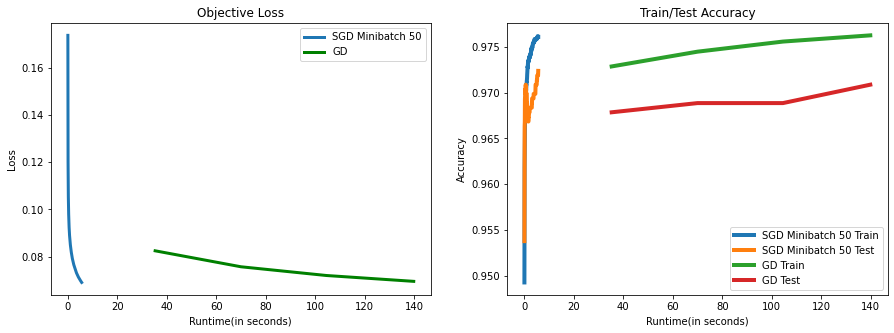

In [13]:
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout()

plt.subplot(1,2,1)
plt.plot(epochTimes, trainLoss, label = "SGD Minibatch 50", linewidth=3)
plt.plot(epochTimes_gd, trainLoss_gd, 'g',label = "GD", linewidth=3)
#plt.plot(epochTimes_sgd, trainLoss_sgd, 'r',label = "SGD", linewidth=3)
plt.title("Objective Loss")
plt.xlabel('Runtime(in seconds)')
plt.ylabel('Loss')
plt.legend()
plt.savefig('SGD_vs_GD_Loss.png')

plt.subplot(1,2,2)
plt.plot(epochTimes, trainPred, label = "SGD Minibatch 50 Train", linewidth=4)
plt.plot(epochTimes, testPred, label = "SGD Minibatch 50 Test", linewidth=4)
plt.plot(epochTimes_gd, trainPred_gd, label = "GD Train", linewidth=4)
plt.plot(epochTimes_gd, testPred_gd, label = "GD Test", linewidth=4)
#plt.plot(epochTimes_sgd, trainPred_sgd, label = "SGD Train", linewidth=4)
#plt.plot(epochTimes_sgd, testPred_sgd, label = "SGD Test", linewidth=4)
plt.title("Train/Test Accuracy")
plt.xlabel('Runtime(in seconds)')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('SGD_vs_GD_Accuracy.png')

# GD Vs SGD Minibatch 50

| Model | RunTime |  Objective Loss | Train accuracy |  Test accuracy |
| --- | --- | --- | --- | --- |
| GD | 148.06 | 0.069| 0.976 | 0.971 |
| SGD Minibatch 50 | 5.73 | 0.069 | 0.976 | 0.972 |


As evident from the two plots above, calculating objective loss or gradient takes very long time for normal gradient descent(~150 seconds for 50000 iterations), because we need to sum over all data points.
Although, exact gradient to reduce the loss in a given iteration is not a must. Some approximation of gradient would work just fine.

Stochastic gradient decent (SGD) approximate the gradient using batchsize. So, evaluating gradient saves a lot of time compared to summing over all data. With minibatch of 50, we are able to complete 50000 iterations in just 5 seconds.

In GD, in order to update the parameters once, we need to have the (exact) gradient. This requires to sum up these all 11791 data points to perform 1 update in theta.

In SGD, we try to get an approximated gradient instead of exact gradient. The approximation is coming from 50 data samples in SGD mini batch. Therefore, in SGD, we update the parameters very quickly.

Hence, while overall accuracy achieved is similar in both models, SGD minibatch is much faster than GD.